# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
cities_df = pd.DataFrame({"city_name": [],
                        "latitude": [],
                        "longitude": [],
                        "max temp": [],
                        "humidity": [],
                        "cloudiness": [],
                        "wind speed": [],
                        "country": [],
                        "date": []})

for index, city in enumerate(cities):
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"

    weather_url = f'{base_url}q={city}&units=imperial&appid={weather_api_key}'
    response = requests.get(weather_url).json()

    try:
        print(f"Processing Record {index} | {city}.")
        cities_df.loc[index, 'city_name'] = response['name']
        cities_df.loc[index, 'latitude'] = response['coord']['lat']
        cities_df.loc[index, 'longitude'] = response['coord']['lon']
        cities_df.loc[index, 'max temp'] = response['main']['temp_max']
        cities_df.loc[index, 'humidity'] = response['main']['humidity']
        cities_df.loc[index, 'cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'wind speed'] = response['wind']['speed']
        cities_df.loc[index, 'country'] = response['sys']['country']
        cities_df.loc[index, 'date'] = response['dt']

    except (KeyError, NameError):
        print("City not found. Skipping...")

Processing Record 0 | ushuaia.
Processing Record 1 | cazaje.
City not found. Skipping...
Processing Record 2 | thompson.
Processing Record 3 | butaritari.
Processing Record 4 | busselton.
Processing Record 5 | belushya guba.
City not found. Skipping...
Processing Record 6 | mataura.
Processing Record 7 | punta arenas.
Processing Record 8 | barrow.
Processing Record 9 | mar del plata.
Processing Record 10 | bluff.
Processing Record 11 | jamestown.
Processing Record 12 | kahului.
Processing Record 13 | kutum.
Processing Record 14 | high prairie.
Processing Record 15 | puerto ayora.
Processing Record 16 | mehamn.
Processing Record 17 | rikitea.
Processing Record 18 | upernavik.
Processing Record 19 | san quintin.
Processing Record 20 | micheweni.
Processing Record 21 | itoman.
Processing Record 22 | oranjemund.
Processing Record 23 | hermanus.
Processing Record 24 | amderma.
City not found. Skipping...
Processing Record 25 | codrington.
Processing Record 26 | katsuura.
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df.head()

,city_name,latitude,longitude,max temp,humidity,cloudiness,wind speed,country,date
0,Ushuaia,-54.8000,-68.3000,48.20,81.0,20.0,5.75,AR,1.617073e+09
2,Thompson,55.7435,-97.8558,6.80,78.0,90.0,27.63,CA,1.617074e+09
3,Butaritari,3.0707,172.7902,81.66,78.0,61.0,16.44,KI,1.617074e+09
4,Busselton,-33.6500,115.3333,81.00,64.0,20.0,3.00,AU,1.617074e+09
6,Mataura,-46.1927,168.8643,64.00,77.0,99.0,3.00,NZ,1.617074e+09


In [7]:
cities_df.to_csv("city_weather.csv")
cities_df

,city_name,latitude,longitude,max temp,humidity,cloudiness,wind speed,country,date
0,Ushuaia,-54.8000,-68.3000,48.20,81.0,20.0,5.75,AR,1.617073e+09
2,Thompson,55.7435,-97.8558,6.80,78.0,90.0,27.63,CA,1.617074e+09
3,Butaritari,3.0707,172.7902,81.66,78.0,61.0,16.44,KI,1.617074e+09
4,Busselton,-33.6500,115.3333,81.00,64.0,20.0,3.00,AU,1.617074e+09
6,Mataura,-46.1927,168.8643,64.00,77.0,99.0,3.00,NZ,1.617074e+09
...,...,...,...,...,...,...,...,...,...
576,Ransang,8.9603,117.5828,86.45,65.0,48.0,4.41,PH,1.617074e+09
577,Conselheiro Pena,-19.1722,-41.4722,74.97,79.0,9.0,1.41,BR,1.617074e+09
578,Jalu,29.0331,21.5482,52.77,69.0,0.0,7.83,LY,1.617074e+09
579,Hohhot,40.8106,111.6522,50.00,27.0,0.0,2.24,CN,1.617074e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
high_humidity = cities_df.loc[cities_df["humidity"] > 100.0]
high_humidity

,city_name,latitude,longitude,max temp,humidity,cloudiness,wind speed,country,date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The below scatter plot is looking the relationship between each city's latitude coordinate and each city's maximum temperatures. Looking at the data, you can see the higher the latitude, the colder the temperature is Fahrenheit (F).

''

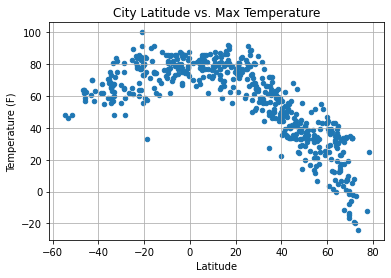

In [17]:
cities_df.plot.scatter('latitude', 'max temp')
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(axis="both")
plt.savefig("../Images/latitude_vs_temp.png")
;

## Latitude vs. Humidity Plot

The scatter plot below is looking at the relationship between each city's latitude and the humidity in each city. Looking the data, the data points are all over the plot, so it difficult to see a relationship between the two variables. 

''

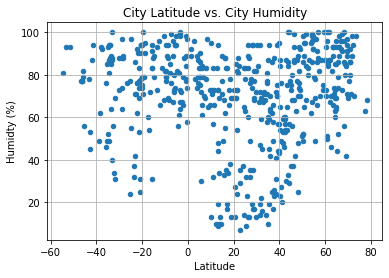

In [18]:
cities_df.plot.scatter('latitude', 'humidity')
plt.title("City Latitude vs. City Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidty (%)")
plt.grid(axis="both")
plt.savefig("../Images/latitude_vs_humidity.png")
;

## Latitude vs. Cloudiness Plot

The scatter plot below is looking at the relationship between each city's latitude coordinate and the cloudiness in each city. Looking the data, the data points are all over the plot, so it difficult to see a relationship between the two variables. 

''

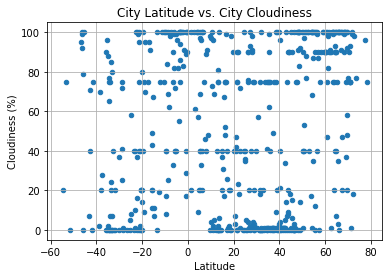

In [19]:
cities_df.plot.scatter('latitude', 'cloudiness')
plt.title("City Latitude vs. City Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="both")
plt.savefig("../Images/latitude_vs_cloudiness.png")
;

## Latitude vs. Wind Speed Plot

The scatter plot below is looking at the relationship between each city's latitude and the wind speed in each city. Looking the data, you can a majority of data points have wind speeds less than 10 mph.

''

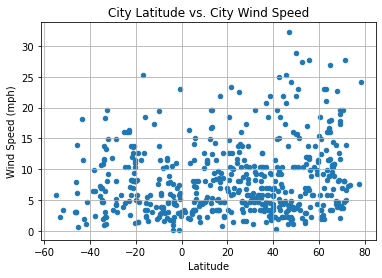

In [20]:
cities_df.plot.scatter('latitude', 'wind speed')
plt.title("City Latitude vs. City Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(axis="both")
plt.savefig("../Images/latitude_vs_windspeed.png")
;

## Linear Regression

In [21]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
northern_hemisphere_df = cities_df.loc[cities_df['latitude'] >= 0.0]
southern_hemisphere_df = cities_df.loc[cities_df['latitude'] < 0.0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression shows there's a negative linear relationship between temperature and latitude for the cities in the Northern Hemisphere. The trend shows that temperature decreases the further away a city is from 0 (the equator). 

The r-value is -0.8818570269814915


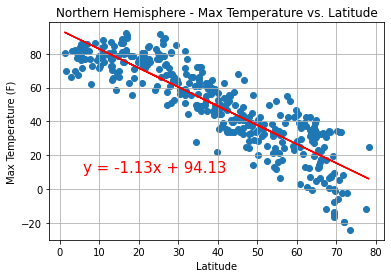

In [22]:
x_label = northern_hemisphere_df['latitude']
y_label = northern_hemisphere_df['max temp']
plt.scatter(x_label, y_label)
plt.title("Northern Hemisphere - Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

plt.savefig("../Images/northernhem_temp_vs_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression shows there's a positive linear relationship between temperature and latitude for the cities in the Southern Hemisphere. The trend shows that temperature increase the closer a city is to 0 (the equator). 

The r-value is 0.5783274633657421


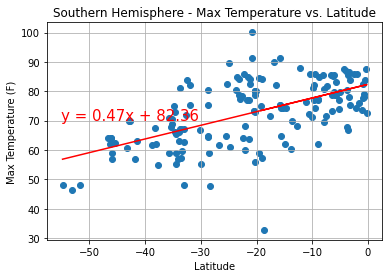

In [38]:
x_label = southern_hemisphere_df['latitude']
y_label = southern_hemisphere_df['max temp']
plt.scatter(x_label, y_label)
plt.title("Southern Hemisphere - Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

plt.savefig("../Images/southernhem_temp_vs_lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The is a slightly positive linear relationship between humidity and latitude for cities located in the Northern Hemisphere. There seem to be more data with higher percentages of humidity.

The r-value is 0.2976154668188708


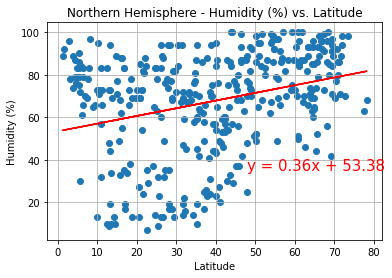

In [24]:
x_label = northern_hemisphere_df['latitude']
y_label = northern_hemisphere_df['humidity']
plt.scatter(x_label, y_label)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(48,35),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

plt.savefig("../Images/northernhem_humidity_vs_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Even with the data points all over the plot, there is a slightly positive linear relationship between humidity and latitude for cities located in the Southern Hemisphere.

The r-value is 0.13255312466402938


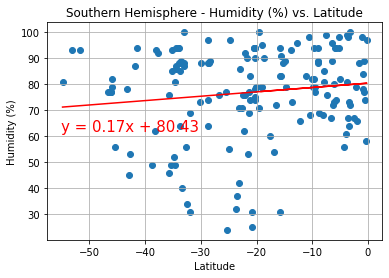

In [37]:
x_label = southern_hemisphere_df['latitude']
y_label = southern_hemisphere_df['humidity']
plt.scatter(x_label, y_label)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(-55,62),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

plt.savefig("../Images/southernhem_humidity_vs_lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is a postitive relationship between latitude and cloudiness for cities located in the Northern Hemisphere. Two data clusters appear: one cluster with datapoints consisting of all latitudes and 100% cloudiness, and another cluster with datapoints consisting of all latitudes with 0 cloudiness.

The r-value is 0.2800185827630484


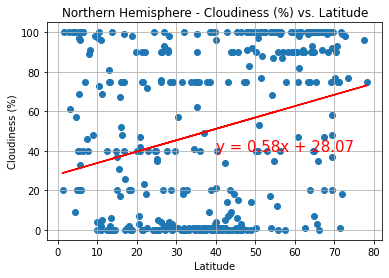

In [39]:
x_label = northern_hemisphere_df['latitude']
y_label = northern_hemisphere_df['cloudiness']
plt.scatter(x_label, y_label)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

plt.savefig("../Images/northernhem_cloudiness_vs_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is a postitive relationship between latitude and cloudiness for cities located in the Souther Hemisphere. Two data clusters appear: one cluster with datapoints consisting of latitudes between -10 and 0 and 100% cloudiness, and another cluster with datapoints consisting of latitudes between -40 and -10  with 0 cloudiness.

The r-value is 0.34368742895738985


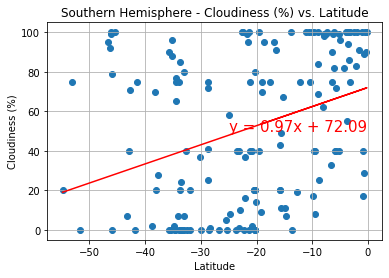

In [27]:
x_label = southern_hemisphere_df['latitude']
y_label = southern_hemisphere_df['cloudiness']
plt.scatter(x_label, y_label)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

plt.savefig("../Images/southernhem_cloudiness_vs_lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is a slightly positive linear relationship between wind speed and latitude for cities in the Northern Hemisphere. There is a large cluster of data points with wind speeds less than 15 mph.

The r-value is 0.18710244017878977


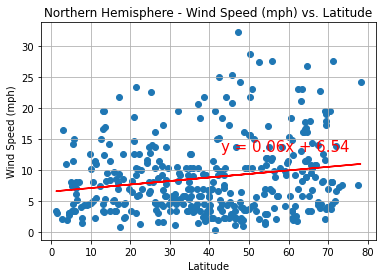

In [40]:
x_label = northern_hemisphere_df['latitude']
y_label = northern_hemisphere_df['wind speed']
plt.scatter(x_label, y_label)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(43,13),fontsize=15,color="red")
print(f"The r-value is {rvalue}")
plt.savefig("../Images/northernhem_windspeed_vs_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is a slightly negative linear relationship between wind speed and latitude for cities in the Southern Hemisphere. 

The r-value is -0.05763639405602169


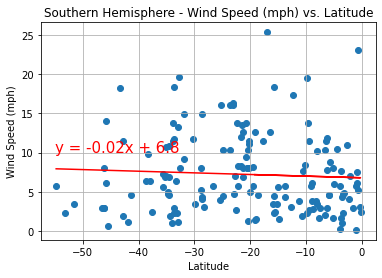

In [41]:
x_label = southern_hemisphere_df['latitude']
y_label = southern_hemisphere_df['wind speed']
plt.scatter(x_label, y_label)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
print(f"The r-value is {rvalue}")
plt.savefig("../Images/southernhem_windspeed_vs_lat.png")

## Observable Trends

Three observable trends from looking at the data above include:
1. Latitude and temperature do appear to have a relationship. As you can see in the plot labeled "City Latitude vs. City Max Temperature", you can citys with a latitude closer to zero have a higher temperature, and as the latitude increases and goes further from zero, the temperature decreases. This makes sense since zero represents the equator, so the temperature would be higher.
2. Looking at the plot, "City Latitude vs. City Cloudiness", there seems to be no relationship between latitude and city cloudiness as the data points are all over the plot. 
3. When you look at the northern and southern hemisphere plots comparing wind speed (mph) to latitude, the northern hemisphere has a cluster of datapoints below 15 mph, where the southern hemisphere is slightly more spread out.